# JNB LAB: After-School Program Demo

:::{note}
One way to wrap-up an after-school program is to have the students do a combined presentation showing several things they learned throughout the program. It is a good idea to practice the presentations at least once or twice in advance.
:::

Today our class will demonstrate several things which can be done with Jupyter Notebooks.

First we load standard libraries for analyzing and plotting data.
        

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

```{index} City of Chicago budget
```

## DEMO 1: City of Chicago Budget
We will make a piechart of the City of Chicago budget.

1) First let's look at the 2022 City of Chicago revenue details.

<img src="Chi2022Revenue.jpg" width="600px"> 

2) Next let's read an Excel sheet with the summary of the 2023 budget.

In [2]:
budget=pd.read_excel('ChicagoBudget.xlsx')
budget

EXPENSE  2023 BUDGET
0  Finance and Administration    688251735
1              Infrastructure   1544641397
2               Public Safety   2711251614
3          Community Services    293957760
4            City Development    174766005
5                  Regulatory     74509317
6   Legislative and Elections     92114035
7           General Financing   7761542137

3) A pie chart will show us the proportions.

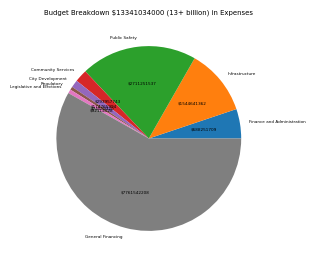

In [3]:
fig, ax = plt.subplots(figsize=(3,3)) #you can adjust the figsize  (5,5)=(length,width)
plt.rcParams['font.size'] = 3  #fontsize
budget_items = budget["EXPENSE"] #categories
budget_amounts = budget["2023 BUDGET"] #amounts
total=sum(budget_amounts)
ax=plt.pie(budget_amounts,labels=budget_items,autopct=lambda p: '${:.0f}'.format(p * total / 100)) #make pie chart  autopct='%1.0f%%'
plt.gca().set_title('Budget Breakdown $'+str(total)+' (13+ billion) in Expenses',size=5) #add a title
fig.savefig('Budget.png') #save the piechart to a file Budget.png

### Exercise

:::{admonition} Exercise

Enlarge the size of the piechart so it is easier to read. Make sure you enlarge the fontsize as well as the chart size.
:::

```{index} pixel images
```

## Demo 2 Pixel Images
We can increase the resolution of images by increasing the number of pixels.

In [4]:
# PACKAGE: DO NOT EDIT THIS CELL
%matplotlib inline
from ipywidgets import interact
import cv2, os

In [5]:
def makepixelimage(folder, N):

    directory = folder

    # A data structure called a dictionary is used to store the image data and the dataframes we'll make from them.
    imgs = {}
    dfs = {}

    # Specify the pixel image size 
    dsize = (N, N)

    # This will iterate over every image in the directory given, read it into data, and create a 
    # dataframe for it. Both the image data and its corresponding dataframe are stored.
    # Note that when being read into data, we interpret the image as grayscale. 
    pos = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            imgs[pos] = cv2.imread(f, 0) # image data
            imgs[pos] = cv2.resize(imgs[pos], dsize)
            dfs[pos] = pd.DataFrame(imgs[pos]) # dataframe
            pos += 1
    return plt.imshow(imgs[0], cmap="gray")


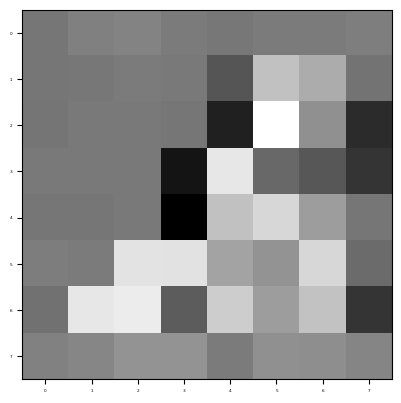

In [6]:
makepixelimage("images", 8)

### Exercise

:::{admonition}Exercise
Increase the image resolution to 16x16 and then 32x32 so the image will become much clearer.
:::


```{index} NFL player positions
```

## DEMO 3: Track NFL Player Positions
We will plot the movement of two players step by step in a given play
Dataset: NFL_play.xlsx

1) Import special libraries.

In [7]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

2)  Read the Player Tracking Data

In [8]:
track_play=pd.read_excel('NFL_play.xlsx')
track_play.head(22)

Unnamed: 0     game_play  game_key  play_id  nfl_player_id  \
0            0  58580_001136     58580     1136          44830   
1            1  58580_001136     58580     1136          42355   
2            2  58580_001136     58580     1136          43330   
3            3  58580_001136     58580     1136          52425   
4            4  58580_001136     58580     1136          43293   
5            5  58580_001136     58580     1136          40031   
6            6  58580_001136     58580     1136          41242   
7            7  58580_001136     58580     1136          52938   
8            8  58580_001136     58580     1136          42347   
9            9  58580_001136     58580     1136          46135   
10          10  58580_001136     58580     1136          43424   
11          11  58580_001136     58580     1136          43351   
12          12  58580_001136     58580     1136          45532   
13          13  58580_001136     58580     1136          46119   
14          14  58580_001136     58580     1136          37082   
15          15  58580_001136     58580     1136          53876   
16          16  58580_001136     58580     1136          53479   
17          17  58580_001136     58580     1136          52663   
18          18  58580_001136     58580     1136          46206   
19          19  58580_001136     58580     1136          52444   
20          20  58580_001136     58580     1136          47800   
21          21  58580_001136     58580     1136          52554   

                    datetime  step  team position  jersey_number  x_position  \
0   2021-10-10T21:08:20.900Z  -108  away       CB             22       61.59   
1   2021-10-10T21:08:20.900Z  -108  away       NT             75       59.63   
2   2021-10-10T21:08:20.900Z  -108  away      ILB             55       60.67   
3   2021-10-10T21:08:20.900Z  -108  home       WR             88       56.59   
4   2021-10-10T21:08:20.900Z  -108  home       RB             21       51.11   
5   2021-10-10T21:08:20.900Z  -108  away       FS             23       70.53   
6   2021-10-10T21:08:20.900Z  -108  home        G             70       57.33   
7   2021-10-10T21:08:20.900Z  -108  home        T             78       57.27   
8   2021-10-10T21:08:20.900Z  -108  home       WR             19       56.23   
9   2021-10-10T21:08:20.900Z  -108  away      OLB             59       59.90   
10  2021-10-10T21:08:20.900Z  -108  home       QB              4       57.31   
11  2021-10-10T21:08:20.900Z  -108  away       CB             24       64.39   
12  2021-10-10T21:08:20.900Z  -108  home       TE             89       57.16   
13  2021-10-10T21:08:20.900Z  -108  home        G             52       57.36   
14  2021-10-10T21:08:20.900Z  -108  home        T             77       57.16   
15  2021-10-10T21:08:20.900Z  -108  away       DE             91       59.65   
16  2021-10-10T21:08:20.900Z  -108  away      OLB             51       59.47   
17  2021-10-10T21:08:20.900Z  -108  away      ILB             48       63.25   
18  2021-10-10T21:08:20.900Z  -108  home       TE             86       57.37   
19  2021-10-10T21:08:20.900Z  -108  away       FS             29       72.19   
20  2021-10-10T21:08:20.900Z  -108  away       DE             97       59.48   
21  2021-10-10T21:08:20.900Z  -108  home        C             63       58.18   

    y_position  speed  distance  direction  orientation  acceleration    sa  
0        42.60   1.11      0.11     320.33       263.93          0.71 -0.64  
1        24.33   0.10      0.01       7.98       227.03          0.41  0.27  
2        30.89   3.19      0.32     334.89       303.31          1.95 -1.73  
3        42.86   0.13      0.01     158.78        98.31          0.32  0.02  
4        26.42   0.14      0.01     144.58        78.52          0.52  0.51  
5        22.03   0.32      0.03     285.68       287.44          0.28  0.27  
6        24.80   0.03      0.01     328.04        57.38          0.07  0.07  
7        23.47   0.1

3) Plot the positions of the players at step -108 (before the snap) of play 1136.

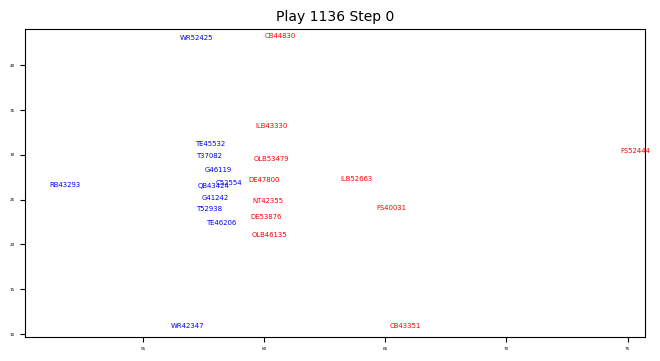

In [9]:
fig= plt.figure(figsize=(8,4))
temp=track_play[track_play["step"]==0]
xmin=temp["x_position"].min()
xmax=temp["x_position"].max()
ymin=temp["y_position"].min()
ymax=temp["y_position"].max()
plt.xlim(xmin-1,xmax+1)
plt.ylim(ymin-1,ymax+1)
for i in temp.index:
    x=temp.loc[i,"x_position"]
    y=temp.loc[i,"y_position"]
    n=temp.loc[i,"nfl_player_id"]
    p=temp.loc[i,"position"]
    if temp.loc[i,"team"]=='home':
        plt.text(x, y, p+str(n),color='b',size=5)
    else:
        plt.text(x, y, p+str(n),color='r',size=5)
plt.title("Play 1136 Step 0",size=10)
plt.show()

4) Let's define a function which creates a snapshot of the position of the players at any step of a given play.

In [10]:
def teampositions(data,play,step):
    playdf=data[data["play_id"]==play]
    playdf = playdf.sort_values(by = 'step')
    playdf=playdf.reset_index(drop=True)
    stepdf=playdf[playdf["step"]==step]
    xmin=stepdf["x_position"].min()
    xmax=stepdf["x_position"].max()
    ymin=stepdf["y_position"].min()
    ymax=stepdf["y_position"].max()
    fig= plt.figure(figsize=(8,4))
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)
    for i in stepdf.index:
        x=stepdf.loc[i,"x_position"]
        y=stepdf.loc[i,"y_position"]
        n=stepdf.loc[i,"nfl_player_id"]
        p=stepdf.loc[i,"position"]
        if stepdf.loc[i,"team"]=='home':
            plt.text(x, y, p,color='b',size=5)
        else:
            plt.text(x, y, p,color='r',size=5)
    plt.title("Play"+str(play)+ "  Step"+str(step),size=10)
    plt.savefig(str(step)+'.png')
    return

5. Let's use this function to create snapshots of player positions for the first 50 steps after the snap of play 1136.

In [ ]:
frames=50
for step in np.arange(0,frames,1):
    teampositions(track_play,1136,step)
    

6. Let's combine these snapshots into an animation. Can you figure out what happened on this play?

In [12]:
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('play.gif',
               save_all=True,
               append_images=images[1:],
               duration=5,
               loop=0)

<img src="play.gif" width="700" align="center">

### Exercise

:::{admonition} Exercise
Create a video which isolates  the movement of just two players: the wide receiver (52425) and cornerback (44830) at the top of the screen.
:::

```{index} word clouds
```

## Demo 4 Word Clouds
Let's make a word cloud Christmas card using the song "Twelve Days of Christmas."

In [13]:
import wordcloud

In [14]:
#Define a function which counts the interesting words
def calculate_frequencies(textfile):
    #list of punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    #list of uninteresting words 
    uninteresting_words = ["AND","BY","IT","THE","THAT","A","IS","HAD","TO","NOT","BUT","FOR","OF","WHICH","IF","IN","ON","WERE","YE","THOU"]
    
     # removes punctuation and uninteresting words
    import re
    fc1=str(textfile)
    fc2= fc1.split(' ')
    for i in range(len(fc2)): 
        fc2[i] = fc2[i].upper()
    #Remove punctuations
    fc3 = []
    for s in fc2:
        if not any([o in s for o in punctuations]):
            fc3.append(s)
    #Remove uninteresting words
    fc4=[]
    for s in fc3:
        if not any([o in s for o in uninteresting_words]):
            fc4.append(s)
    fc5=[]
    for s in fc4:
        if not any([o.lower() in s for o in uninteresting_words]):
            fc5.append(s)
            
    while('' in fc5) : 
        fc5.remove('') 
        
    import collections
    fc6 = collections.Counter(fc5)

    #wordcloud
    cloud = wordcloud.WordCloud( max_words = 12)  #can adjust the number of words
    cloud.generate_from_frequencies(fc6)
    return cloud.to_array()

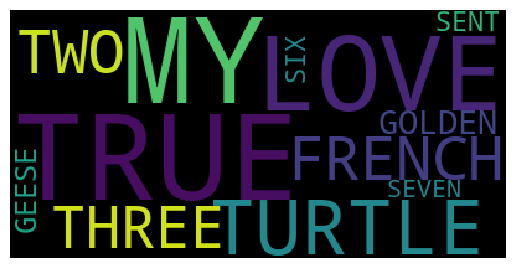

In [15]:
#Open the text file with the words to be plotted.
with open('twelvedays.txt','r') as file:  
    carol = file.readlines()
    
#make the wordcloud   
carol = calculate_frequencies(carol)
plt.imshow(carol, interpolation = 'nearest')
plt.axis('off')
plt.savefig('card.png', bbox_inches='tight')  

### Exercise

:::{admonition} Exercise
Add the words "Merry Christmas!" in red onto the middle of the wordcloud.
:::

<h3>Demo 5 Name that Tune</h3>

```{index} sound waves
```

1) Musical sound waves are created by rapid vibrations caused by musical isntruments. 

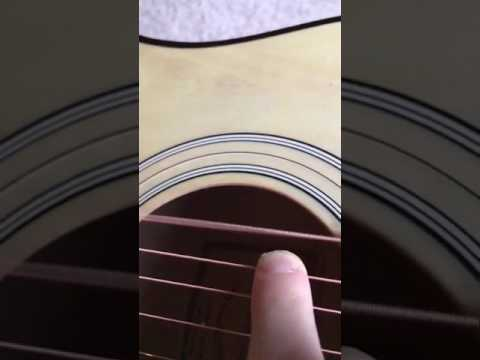

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('tVYQRC1-D54')

2)  Sound waves are represented mathematically by sine waves with different frequencies.

In [17]:
def sinewave(frequency):
    #-----------CREATE THE SOUND WAVE-------------------
    sampling_rate=44100  #how many times we take a measurement each second
    t = np.linspace(0,1,sampling_rate)  # take 44100 samples in 1 second; 
    sound_wave=np.sin(frequency* 2*np.pi* t)  # mathematical definition of a sine wave
    #----------PLOT THE SOUND WAVE----------------------
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(2,1))
    plt.plot(t,sound_wave)
    plt.xlabel("seconds")
    return

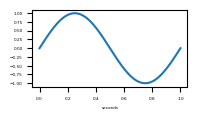

In [18]:
sinewave(1)  #frequency=1 and 1 cycle per second

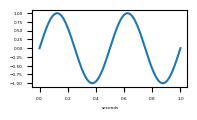

In [19]:
sinewave(2)  #frequency=2 and 2 cycles per second

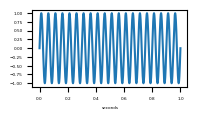

In [20]:
sinewave(20) #frequency=20 and 20 cycles per second

3) A computer can create a musical tone based on a given frequency.

```{index} musical tone
```

In [21]:
def play(freq):
    import numpy as np
    from IPython.display import Audio  #library used to create sounds
    sampling_rate = 44100 # <- rate of sampling
    t = np.linspace(0, 2,  sampling_rate) # <- setup time values
    sound_wave = np.sin(2 * np.pi * freq * t) # <- sine function formula
    return Audio(sound_wave, rate=sampling_rate, autoplay=True) # play the generated sound

In [22]:
play(220) # play a sound at 220 hz 

4) A musical scale is a sequence of frequencies.

In [23]:
from IPython.display import Audio 
rest=0
do=220
re=9/8*220
mi=5/4*220
fa=4/3*220
so=3/2*220
la=5/3*220
ti=15/8*220
do1=2*220
re1=2*9/8*220
mi1=2*5/4*220
fa1=2*4/3*220
so1=2*3/2*220
la1=2*5/3*220
ti1=2*15/8*220
do2=2*2*220
scale=[do,re,mi,fa,so,la,ti,do1]

In [24]:
def play(song):
    song=np.array(song)
    framerate = 44100
    t = np.linspace(0, len(song) / 2, round(framerate * len(song) / 2))[:-1]
    song_idx = np.floor(t * 2).astype(int)
    data = np.sin(2 * np.pi * song[song_idx] * t)
    return Audio(data, rate=framerate, autoplay=True)
play(scale)

5) Can you name that tune?

In [25]:
tune= [so, so , la, la, so, fa,mi,rest,so, so , la, la, so, fa,mi,rest,so,so,la,ti,do1,do1,re1,re1,ti,la,ti,la,so,so,la,ti,do1,do1,ti,la,so,so,rest,rest,la,la,so,fa,mi,mi,rest,rest,so,so,do,fa,mi,mi,re,re,do,do,do,do,rest,rest]
play(tune)

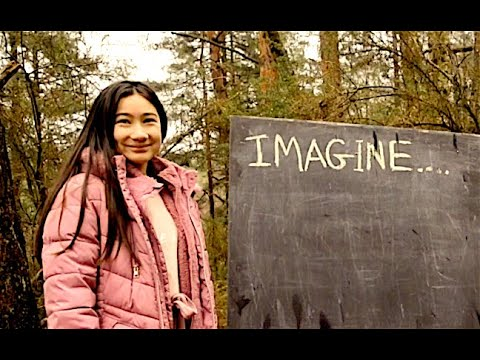

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('L4PA-MFSM34')

### Exercise

:::{admonition} Exercise
Demonstrate how to create a new tune.
:::